# IMM - Taller 08 (22/10/2024)



---
---

## 1. Repaso de derivadas

La [derivada](https://https://www.geogebra.org/m/P5DRE8R4)  de la función $f(x): \mathbb{R}\to\mathbb{R} $ es una medida del cambio que ocurre en la cantidad $y=f(x)$ cuando se realiza un pequeño cambio en la cantidad $x$.  Formalmente, la derivada se define a través del límite

$$f^\prime(x)= \frac{df}{dx} = \lim_{h \to 0}\frac{f(x+h)-f(x)}{h},$$

el cual se puede interpretar geométricamente  como la pendiente de la recta tangente a la función en el punto $x$, como se indica el trazo rojo en la figura.

<img src=https://www.math.net/img/a/calculus/limit-definition-of-a-derivative-1.png  width=400>

desde el punto de vista del modelamiento, su importancia radica en que
- muchas entidades físicas se definen como la tasa instantánea de cambio de alguna otra cantidad
  - ejemplo: la velocidad se relaciona con la derivada temporal del desplazamiento
- la derivada permite "optimizar" una función
  - ejemplo: encontrar el máximo o el mínimo de una función


---
---
---

## 2. Ecuaciones diferenciales ordinarias

Una ecuacion diferencial ordinaria (EDO) es una ecuación en las que se relacionan una variable independiente $x$, una funcion $y(x)$, que es desconocida, y las derivadas de $y(x)$. Matemáticamente

$$\mathcal{F}\left[x, y, \frac{dy}{dx},\cdots, \frac{d^ny}{dx^n}\right] = 0,$$

donde $n$ es llamado el orden de la ecuación.

Este tipo de relaciones entre una cantidad y sus tasas de cambio son frecuentes en áreas de las ciencias naturales, la ingeniería o la economía. Existe una gran cantidad de fenómenos reales complejos que pueden ser formulados en términos de ecuaciones diferenciales. En particular, algunos *sistemas dinámicos en tiempo continuo* pueden modelarse mediante  EDOs, lo cual permite predecir sus comportamientos futuros, entre otras cosas.

En los problemas a tratar en este curso nos limitaremos a problemas de primer $(n=1)$ y segundo orden $(n=2)$.













**Ejemplo: Ley de enfriamiento/calentamiento de Newton**

La ley de enfriamiento/calentamiento de Newton establece que la rapidez con la que cambia la temperatura de un objeto es proporcional a la diferencia entre su temperatura y la del medio que lo rodea ( temperatura del ambiente). Si $T(t)$ indica la temperatura del cuerpo en el tiempo $t$ y $T_m$ es la temperatura del ambiente (que se considera constante), entonces, la ley de  enfriamiento/calentamiento de Newton determina que

$$\frac{dT}{dt} = -k \left( T  - T_m \right),$$

donde $k$ es una constante de proporcionalidad relacionada con la capacidad de transmisión de calor del objeto al medio y al área superficial del objeto.


---
### 2.1 Sistemas de ecuaciones diferenciales



A menudo es posible que se presenten problemas en los que el modelo involucra no solo una ecuación diferencial sino un sistema de ecuaciones diferenciales. Además, toda ecuación diferencial de orden superior  se puede expresar de manera equivalente como un sistema de ecuaciones de primer orden








> **Ejemplo 1: Sistema de ecuaciones diferenciales de primer orden**

>  El [modelo de Michaelis y Menten](https://es.wikipedia.org/wiki/Cin%C3%A9tica_de_Michaelis-Menten) describe el comportamiento cinético de las reacciones catalizadas enzimáticamente. El modelo propone que la reacción ocurre en dos fases: en la primera se crea el complejo enzima-sustrato, y en la segunda éste complejo da lugar a la formación del producto liberando la enzima:

$${\large S+E} \overset{\overset{k_1}{\longrightarrow}}{\underset{k_{-1}}{\longleftarrow}} {\large C}  \overset{k_2}{\longrightarrow} {\large P + E} $$

> En estas condiciones, la razón de cambio de cada uno de los componentes de la reacción viene dada por
$$\begin{eqnarray}
\frac{dS}{dt}&=& -k_1\,S\,E + k_{-1}\,C \\
\frac{dE}{dt}&=& -k_1\,S\,E + k_{-1}\,C + k_2\,C \\
\frac{dC}{dt}&=& +k_1\,S\,E - k_{-1}\,C - k_2\,C \\
\frac{dP}{dt}&=&  + k_2\,C \\
\end{eqnarray}$$

> donde $S$, $E$, $C$ y $P$ son, respectivamente, las concentraciones del sustrato, de la enzima, del complejo y del producto, mientras que $k_1$, $k_{-1}$, y $k_2$ son las constantes de velocidad de reacción.

> Este sistema se puede definir en python a través de una función como
```
def michaelis_menten(S,E,C,P):  
  dS_dt = -k1*S*E + km1*C
  dE_dt = -k1*S*E + km1*C + k2*C
  dC_dt = +k1*S*E - km1*C - k2*C
  dP_dt = +k2*C
  return dS_dt, dE_dt, dC_dt, dP_dt
```

> **Ejemplo 2: Ecuación diferencial de orden superior expresada como un sistema de ecuaciones diferenciales de primer orden**

>De acuerdo con la segunda ley de Newton, el [movimiento de un paracaidista](http://www.sc.ehu.es/sbweb/fisica/dinamica/paracaidista/paracaidista.html) se puede representar  (una vez abierto el paracaidas)  a través de la ecuación

$$m\,\frac{d^2y}{dt^2} = - m\,g + b\, v^2,$$

>donde $y(t)$ representa la altitud, $v(t)$ la velocidad y $m$ la masa del paracaidista, mientras que el parámetro $b$ marca la intensidad de la fricción debida al aire.

>Esta ecuación de segundo orden se puede expresar como el sistema de ecuaciones de primer orden

$$
\begin{eqnarray}
\frac{dy}{dt} &=& v \\
\frac{dv}{dt} &=& - \,g + \frac{b}{m}\, v^2 \\
\end{eqnarray}
$$

> Este sistema se puede definir en python a través de una función como
```
def movimiento_paracaidista(y,v):  
  dy_dt = v
  dv_dt = -g + (b/m)*v**2
  return dy_dt, dv_dt
 ```

---
---
---

## 3. Campo de velocidades de una ecuación diferencial


La evaluación del [campo de velocidades](http://faculty.sfasu.edu/judsontw/ode/html-20190821/systems02.html) permite obtener una idea geométrica general del comportamiento de un sistema cuya dinámica se modela a través de una ecuación diferencial dada. Suponga que se quiere analizar un sistema de EDO de la forma

\begin{eqnarray}
\dfrac{dx(t)}{dt} &=& f(x,y)\\
\dfrac{dy(t)}{dt} &=& g(x,y)
\end{eqnarray}

El campo de velocidades en el plano $(x,y)$ se define asignando a cada punto $(x_0,y_0)$  el vector unitario
\begin{equation}
\vec{u} = (u_1 , u_2) := \dfrac{1}{\sqrt{ V_1^2 + V_2^2 } } \, ( V_1 , V_2) ,
\end{equation}
donde
- $V_1 = \dfrac{dx}{dt} \Big|_{x_0,y_0} = f(x_0,y_0)$

- $V_2 = \dfrac{dy}{dt} \Big|_{x_0,y_0} = g(x_0,y_0)$

$~$

El campo de velocidades nos sirve para obtener información "cualitativa" del comportamiento de la solución. En particular podemos obtener información de:

- puntos de equilibrio.
- puntos de silla.
- regiones del plano de crecimiento y decrecimiento dependiendo de la condición inicial $(x_0,y_0)$

**Nota**: Es importante notar que no es necesario resolver la ecuación diferencial para hallar su campo de velocidades






---
### 3.1 Ejemplo

Considere un sistema caracterizado por las variables $x(t)$ y $y(t)$, cuya evolución se puede describir mediante el siguiente sistema de EDO:

\begin{eqnarray}
\dfrac{dx}{dt} &=& x\,(y-1)\\
\dfrac{dy}{dt} &=& 2-x^2-y^2
\end{eqnarray}

y condición inicial $\left( x_0, y_0\right)$.

1. Encuentre el campo de velocidades del sistema de  ecuaciones diferenciales en el conjunto de condiciones iniciales $x_0\in [-5, 5]$ para diferente y $y_0 \in [-5, 5]$

2. Usando el campo de velocidades indague  si existen puntos de equilibrio y de silla

3. Usando el campo de velocidades describa cómo evolucionarían las variables $x$ y $y$ si la condición inicial fuera $(x_0,y_0)=(-2,4)$



**Solución**

- **Primer punto:**

In [1]:
# Importa las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definición de la ecuacion diferencial o
# del sistema de ecuaciones diferenciales
def edo_ejemplo(x,y):             # Dos argumentos
    dx_dt = x*(y-1)
    dy_dt = 2-x**2-y**2
    return dx_dt, dy_dt           # Dos salidas

In [3]:
# Definción del conjunto de condiciones iniciales a
# considerar para las variables dinámicas de interés

x0min = -5  # x mínimo
x0max =  5  # x máximo
y0min = -5  # y mínimo
y0max =  5  # y máximo

# Definción de arreglos y del mallado necesario para
# la evaluación del campo de velocidades

N = 30                         # Número de puntos
x0 = np.linspace(x0min, x0max, N) # Rango de valores de x
y0 = np.linspace(y0min, y0max, N) # Rango de valores de y

X_malla, Y_malla = np.meshgrid(x0, y0) # Crea la malla de puntos (x0,y0)

In [4]:
# Definición de la matriz con las componentes de los
# vectores unitarios asociados al sistema de EDOs

dX_dt, dY_dt = edo_ejemplo(X_malla, Y_malla) # función con dos salidas

V1 = dX_dt                     # Componente horizontal: V1 = dx/dt
V2 = dY_dt                     # Componente vertical:   V2 = dy/dt
norma = np.sqrt(V1**2 + V2**2) # Norma del vector: raiz(V1^2+V2^2)
#
u1 = V1 / norma  # Componente horizontal del vector normalizado
u2 = V2 / norma  # Componente vertical del vector normalizado

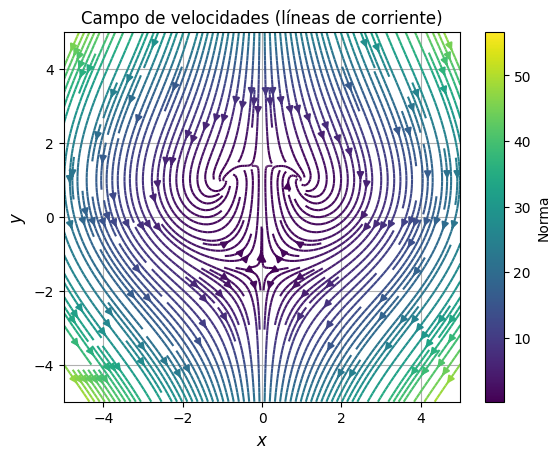

In [5]:
### Gráfica del campo de velocidades
### Se presentan 4 opciones para realizarlo

# (1) Diagrama de vectores (por defecto)
#plt.quiver(X_malla, Y_malla, u1, u2)

# (2) Diagrama de vectores con escala de color
#plt.quiver(X_malla, Y_malla, u1, u2, norma)
#plt.colorbar(label='Norma')

# (3) Diagrama de líneas de corriente (por defecto)
#plt.streamplot(X_malla, Y_malla, u1, u2)

# (4) Diagrama de líneas de corriente con escala de color
plt.streamplot(X_malla, Y_malla, u1, u2, density = 2.6, color=norma)
plt.colorbar(label='Norma')

# Atributos de la gráfica
plt.title('Campo de velocidades (líneas de corriente)')
plt.xlabel('$x$',size=12)
plt.ylabel('$y$',size=12)
plt.axis([x0min, x0max, y0min, y0max])
plt.grid()

plt.show()

- **Segundo punto:**

 > Del campo de velocidades podemos inferir lo siguiente:
  - Hay puntos de silla en ...
  - Hay puntos de equilibrio en ...

> Evaluando los puntos críticos se obtiene:
$$
\begin{eqnarray}
x \,(y-1) &=& 0 \\
2-x^2-y^2 &=& 0
\end{eqnarray}
$$
que tiene como solución los puntos
$$(x_{\rm crit},y_{\rm crit}) = (0,\pm\sqrt{2})$$
$$(x_{\rm crit},y_{\rm crit}) = (\pm 1,1)$$


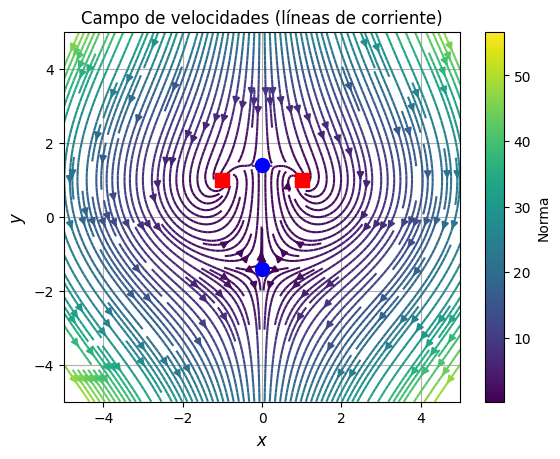

In [6]:
### Gráfica del campo de velocidades (líneas de corriente)
plt.streamplot(X_malla, Y_malla, u1, u2, density = 2.6, color=norma)
plt.colorbar(label='Norma')
plt.plot([0,0],[-np.sqrt(2),np.sqrt(2)],'ob',markersize=10)
plt.plot([-1,1],[1,1],'sr',markersize=10)
# Atributos de la gráfica
plt.title('Campo de velocidades (líneas de corriente)')
plt.xlabel('$x$',size=12)
plt.ylabel('$y$',size=12)
plt.axis([x0min, x0max, y0min, y0max])
plt.grid()
plt.show()


- **Tercer punto:**


 > Si el sistema parte de la condición $(x_0,y_0)=(-2,4)$, entonces ...

